# Homework 1 Part 2

**Due: Monday, September 16, 11:59 PM**

This is an individual assignment.

## Description

Create or edit this Jupyter Notebook to answer the questions below. Use simulations to answer these questions. An analytical solution can be useful to check if your simulation is correct but analytical solutions alone will not be accepted as a solution to a problem.

In [3]:
import random
import numpy.random as npr
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

## Problem 7

Consider repeatedly rolling a fair 6-sided die.

1. Create a simulation to compute the probability that the top face will be 6 at least once on 3 rolls of the die?
2. Create a simulation to compute the probability that the top face will be 6 at least once on 6 rolls of the die?
3. Create a simulation to compute how many rolls of the die would you have to do to be 90% confident that you would see at least one 6?
4. Using the formula you have computed in problem 2 part 4, make a Python function that takes in the target value $p$ and outputs the required number of rolls of an integer. 
    1. Find the values for $p=0.95$ and $p=0.99$. 
    2. Use your simulation to verify that the number of rolls you specified is sufficient to achieve $p\geq 0.95$.

In [5]:
# 1
count=0
#for i in range (0,3):
    
 #   if dice == 6:
#        count += 1
#prob = count/3
#print(f"Probabilty = {prob}")

num_simulations=100_000
dice = npr.randint(1,7,size=(num_simulations,3))
count = np.sum(np.any(dice==6,axis=1))
print("Probability that die's top face will be 6 at least once on 3 rolls of the die ", count/100000)

Probability that die's top face will be 6 at least once on 3 rolls of the die  0.42193


In [6]:
#2
count=0
num_simulation=100_000
dice = npr.randint(1,7,size=(num_simulation,6))
count = np.sum(np.any(dice==6,axis=1))
print("Probability that die's top face will be 6 at least once on 6 rolls of the die ", count/100000)

Probability that die's top face will be 6 at least once on 6 rolls of the die  0.6665


In [7]:

#3
p = .9
n = (np.log(1 - p) / np.log(5/6))
print(n)

12.62925313651334


In [8]:
#4a
p = [.95, .99]
for i in p:
    n = (np.log(1 - i) / np.log(5/6))
    print(n)

16.431037153437263
25.258506273026672


In [9]:
#4b
#you would need around 17 rolls.

## Problem 8

Create a simulation function where you will roll a fair 6-sided die 20 times and count the number of times the face $x$ comes up on the top face of the die. 

* In your simulation, create a list that will store the number of times it came up $x$ on the top face of the die.
* Create a plot of unique counts vs their relative frequency

Using your simulation function, run it for:

1. $x=3$

2. $x=[5,6]$, that is, probability of observing a 5 or a 6 on the top face.

3. $x=[1,2,3]$, that is, probability of observing a 1, 2 or 3 on the top face.

For both cases, comment the plotting results. For a *sufficient* amount of simulations, does it behave as *expected*?

Text(0.5, 1.0, 'Unique Counts vs Relative frequency')

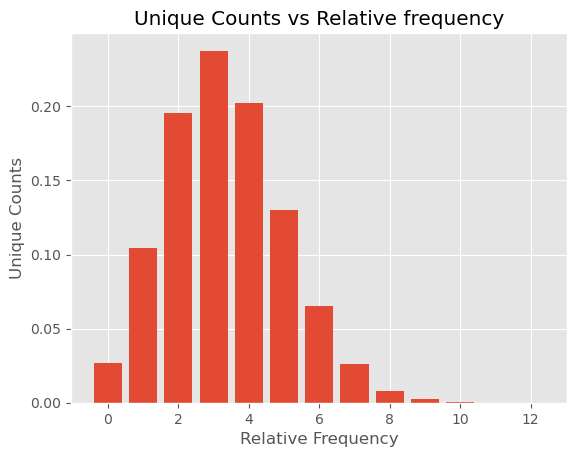

In [11]:
num_simulation = 100000
dice = npr.randint(1,7,size=(num_simulation,20))
count = np.sum(dice == 3 , axis=1) # change the dice to accomdate for the other values
uniquecounts, counts = np.unique(count,return_counts=True)
total = np.sum(counts)
freq = counts/total
plt.bar(uniquecounts,(counts/total))
plt.xlabel('Relative Frequency')
plt.ylabel('Unique Counts')
plt.title('Unique Counts vs Relative frequency')

Text(0.5, 1.0, 'Unique Counts vs Relative frequency')

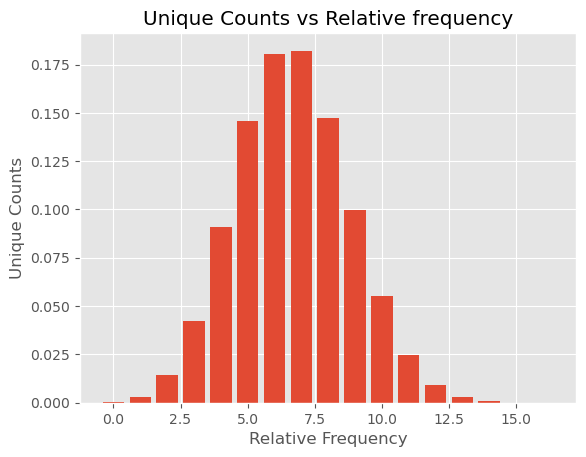

In [12]:
x = [5,6] #change x depending on what you need
num_simulation = 100000
dice = npr.randint(1,7,size=(num_simulation,20))
count = np.sum((dice == 5) | (dice == 6) , axis=1) # change the dice to accomdate for the other values
uniquecounts, counts = np.unique(count,return_counts=True)
total = np.sum(counts)
freq = counts/total
plt.bar(uniquecounts,(counts/total))
plt.xlabel('Relative Frequency')
plt.ylabel('Unique Counts')
plt.title('Unique Counts vs Relative frequency')

Text(0.5, 1.0, 'Unique Counts vs Relative frequency')

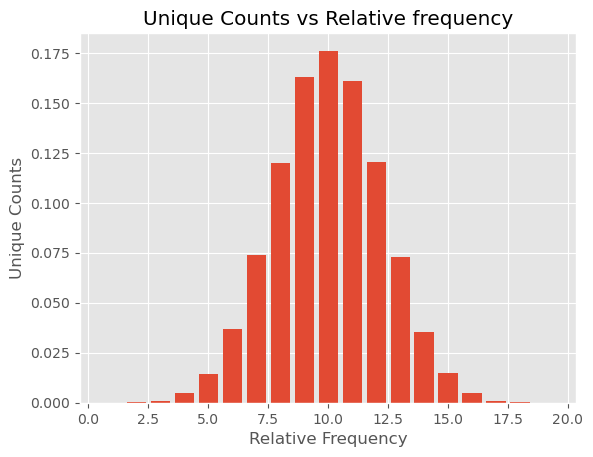

In [13]:
x = [1,2,3] #change x depending on what you need
num_simulation = 100000
dice = npr.randint(1,7,size=(num_simulation,20))
count = np.sum((dice == 1) | (dice == 2) | (dice == 3) , axis=1) # change the dice to accomdate for the other values
uniquecounts, counts = np.unique(count,return_counts=True)
total = np.sum(counts)
freq = counts/total
plt.bar(uniquecounts,(counts/total))
plt.xlabel('Relative Frequency')
plt.ylabel('Unique Counts')
plt.title('Unique Counts vs Relative frequency')

## Problem 9

Suppose that you have a bag with 3 coins. One of them is a fair coin, but the others are biased trick coins. When flipped, the three coins come up heads with probability $\frac{1}{2}$, $\frac{2}{3}$, and $\frac{1}{5}$, respectively.

Consider the experiment where you pick one coin at random and flip it three times. Let $H_i$ be the event that the coin comes up heads on flip $i$. What is the probability of the outcome $H_1\cap H_2\cap \overline{H_3}$?

In [15]:
num_simulations= 100000
def coinflip():
    a = ["h","t"]
    b = ["h","h","t"]
    c = ["h","t","t","t","t"]
    coins = [a,b,c]
    prob = 0
    total = 0
    for t in range(num_simulations):
        turn = 0
        random.shuffle(coins)
        final = coins[0]
        for i in range(0,3):
            turn += 1
            if turn == 3:
                value = random.choices(final)
                if value[0] == 't':
                    prob += 1
                else:
                    pass
            else:
                value = random.choices(final)
        
                if value[0] == 'h':
                    prob += 1
                else:
                    pass
            if prob == 3:
                total +=1
    print(total)
    overall = total/num_simulations
    print(f'Probabilty of the outcome is {overall}')

coinflip()

2
Probabilty of the outcome is 2e-05


## Problem 10

In what follows, apply a significance value $\alpha = 0.01$. That is, there must be less than a 1% probability of seeing such an extreme value under the null hypothesis before we are willing to conclude that the null hypothesis is not reasonable.

* If a 6-sided die is rolled 10 times and all the values are <=4, should we feel confident that the die is not fair (i.e., reject the null hypothesis with $p=0.01$)?

* Conduct the above simulation using a python function.

In [17]:
num_trials=100000
def roll_die(num_rolls=10):
    total = 0
    for t in range(num_trials):
        count = 0
        rolls = []
        for i in range(0,10):
            rolls += [random.randint(1, 6)]
        for t in rolls:
            if t <= 4:
                count += 1
    
        if count == 10:
            total += 1
    return total
total = roll_die()

print(f'Probability of all rolls being less than 4,5, or 6: {total/num_trials}')

# how to do the 10000 simulations
#around 0.015, thus fail to reject null

Probability of all rolls being less than 4,5, or 6: 0.01836


## Problem 11

Consider the experiment where you pick 3 cards at random from a deck of 52 playing cards (13 cards per suit) **without replacement**, i.e., at each card selection you will not put it back in the deck, and so the number of possible outcomes will change for each new draw.

Let $D_i$ denote the event the card is diamonds in the $i$th draw.

Build a simulation to compute the following probabilities:

1. $P(D_1)$

2. $P(D_1 \cap D_2)$

3. $P(D_1 \cap D_2 \cap \overline{D_3})$

4. $P(D_3 \cup D_2|D_1 )$

5. $P(D_3|D_1\cap D_2)$

*Note: to sample from a set **without replacement**, consider use the function ```numpy.random.choice``` by controling the parameter ```replace```*.

In [19]:
#1
num_trials = 100000
count = 0

cards = ['Heart','Club','Diamond','Spade']
for i in range(num_trials):
    card = npr.randint(0,4)
    if cards[card] == 'Diamond':
        count += 1
print('Probability of drawing diamond:', count/num_trials)    

Probability of drawing diamond: 0.2489


In [20]:
#2 without replacement
num_trials = 100000
count = 0

cards = ['Heart','Club','Diamond','Spade']*13
for i in range(num_trials):
    card = np.random.choice(cards,2,replace=False)
    if card[0] == 'Diamond' and card[1] =='Diamond':
        count += 1
print('Probability of drawing diamond 1st and 2nd:', count/num_trials)    

Probability of drawing diamond 1st and 2nd: 0.05959


In [21]:
#3 without replacement
num_trials = 100000
count = 0

cards = ['Heart','Club','Diamond','Spade']*13
for i in range(num_trials):
    card = np.random.choice(cards,3,replace=False)
    if card[0] == 'Diamond' and card[1] =='Diamond' and card[2] !='Diamond':
        count += 1
print('Probability of drawing diamond 1st and 2nd and not a diamond on third', count/num_trials)   

Probability of drawing diamond 1st and 2nd and not a diamond on third 0.04637


In [22]:
#4 without replacement
num_trials = 100000
count = 0

cards = ['Heart','Club','Diamond','Spade']*13
for i in range(num_trials):
    card = np.random.choice(cards,3,replace=False)
    if card[0] == 'Diamond':
        if card[1] =='Diamond' or card[2] =='Diamond':
            count += 1
    else:
        pass
print('Probability:', count/num_trials)  

Probability: 0.1053


In [23]:
#5 without replacement
num_trials = 100000
count = 0

cards = ['Heart','Club','Diamond','Spade']*13
for i in range(num_trials):
    card = np.random.choice(cards,3,replace=False)
    if card[1] =='Diamond' and card[0] =='Diamond':
        if card[2] == 'Diamond':
            count += 1
    else:
        pass
print('Probability: ', count/num_trials)  

Probability:  0.01287


## Problem 12

Suppose that you have 6 coins: 2 fair coins and 4 unfair coins. When flipped, the coins flip heads with probability 0.5, 0.5, 0.8, 0.2, 0.1 and 0.3, respectively. Consider the experiment where you choose a coin at random and flip it for three times. Let $E$ be the event that 3 heads were observed. Compute $P(\text{fair coin}|E)$.

*Note: to encode specific probabilily of flipping heads, you may consider using the function ```numpy.random.choice``` by controlling the parameter ```p```.*

In [25]:
coins = ['fair','fair','8unfair','2unfair','1unfair','3unfair']
fair = ['h','t']
eightcoin = ['h','h','h','h','t']
twocoin = ['h','t','t','t','t']
onecoin= ['h','t','t','t','t','t','t','t','t','t']
threecoin = ['h','h','h','t','t','t','t','t','t','t',]
count = 0
prob = 0
probheadsfair=0
num_simulations = 100000
for t in range(num_simulations):
    count = 0
    index = random.randint(0,5)
    if coins[index] == 'fair':
        for i in range(0,3):
            ran =random.randint(0,1)
            if fair[ran] == 'h':
                count += 1
        if count == 3:
            probheadsfair += 1
            prob +=1
        
    elif coins[index] == '8unfair':
        for i in range(0,3):
            ran = random.randint(0,4)
            if eightcoin[ran] == 'h':
                count += 1
        if count == 3:
            prob += 1
    elif coins[index] == '2unfair':
        for i in range(0,3):
            ran = random.randint(0,4)
            if twocoin[ran] == 'h':
                count += 1
        if count == 3:
            prob += 1
    elif coins[index] == '1unfair':
        for i in range(0,3):
            ran = random.randint(0,9)
            if onecoin[ran] == 'h':
                count += 1
        if count == 3:
            prob += 1
    elif coins[index] == '3unfair':
        for i in range(0,3):
            ran = random.randint(0,9)
            if threecoin[ran] == 'h':
                count += 1
        if count == 3:
            prob += 1
print(probheadsfair)
print(probheadsfair/num_simulations)

4112
0.04112


In [26]:
#simplified
#realized I did not need that much code

coins = ['fair','fair','8unfair','2unfair','1unfair','3unfair']
fair = ['h','t']
count = 0
probheadsfair=0
num_simulations = 100000
for t in range(num_simulations):
    count = 0
    index = random.randint(0,5)
    if coins[index] == 'fair':
        for i in range(0,3):
            ran =random.randint(0,1)
            if fair[ran] == 'h':
                count += 1
        if count == 3:
            probheadsfair += 1
        
    else:
        pass
print(probheadsfair/num_simulations)

0.04132


# Submission Instructions:

When you are done with the exercises in this notebook, upload a PDF or your results to Canvas.  To create the PDF with your code and results, you can use the following procedure:

1. Go to Kernel
2. Click Restart and Run All
3. Check over the notebook to make sure everything still looks right

**At this point, you may be able to just choose "Print" from JupyterLab's File menu and then print to PDF (OS dependent). If everything is correct in the PDF version, then upload that PDF to the assignment in Canvas.**

**If your PDF is missing any of your outputs, you can use the following procedure:**

4. Next, click File at the top on the tool bar below Jupyter icon
5. Click Save and Export Notebook as... and choose HTML
6. The HTML file will either open in a new tab/window or be downloaded to your Downloads folder. Open it if it is in the Downloads folder
7. Print the HTML file to PDF (how to do this is OS dependent). Make sure to save it to somewhere you can find it
8. Open the PDF to make sure that everything looks right and that nothing is cut off
9. Upload both the PDF and ipynb files to the Canvas assignment